**Seeding for reproducibility**

In [5]:
pip install numpy

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [9]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [10]:
!pip install kaggle

In [14]:
kaggle_credentials = json.load(open(r"C:\Users\adity\Downloads\kaggle.json"))


In [16]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [17]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<55:04, 662kB/s]
  0%|          | 2.00M/2.04G [00:01<27:08, 1.34MB/s]
  0%|          | 3.00M/2.04G [00:01<17:22, 2.10MB/s]
  0%|          | 4.00M/2.04G [00:02<12:47, 2.85MB/s]
  0%|          | 5.00M/2.04G [00:02<10:16, 3.55MB/s]
  0%|          | 6.00M/2.04G [00:02<08:36, 4.22MB/s]
  0%|          | 7.00M/2.04G [00:02<07:36, 4.78MB/s]
  0%|          | 8.00M/2.04G [00:02<07:06, 5.12MB/s]
  0%|          | 9.00M/2.04G [00:02<06:47, 5.35MB/s]
  0%|          | 10.0M/2.04G [00:03<06:27, 5.62MB/s]
  1%|          | 11.0M/2.04G [00:03<05:44, 6.32MB/s]
  1%|          | 12.0M/2.04G [00:03<05:03, 7.16MB/s]
  1%|          | 14.0M/2.04G [00:03<04:35, 7.89MB/s]
  1%|          | 15.0M/2.04G [00:03<04:24, 8.23MB/s]
  1%|          | 16.0M/2.04G [00:03<04:45, 7.61MB/s]
  1%|          | 17.0M/2.04G [00:04<04:55, 7.34MB/s]
  1%|          | 18.0M/2.04G [00:04<05:03, 7.15MB/s]
  1%|          | 19.0M/2.04G [00:04<05:07, 7.05MB/s]
  


License(s): CC-BY-NC-SA-4.0



In [1]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 98FA-EFFA

 Directory of c:\Users\adity\plant-disease-prediction-cnn-deep-leanring-project\model_training_notebook

03-10-2024  12:43    <DIR>          .
02-10-2024  23:53    <DIR>          ..
03-10-2024  00:01    <DIR>          .ipynb_checkpoints
03-10-2024  02:30             1,316 class_indices.json
03-10-2024  02:32    <DIR>          drive
03-10-2024  12:40             5,560 model_architecture.json
03-10-2024  12:40       191,221,053 model_weights.pkl
03-10-2024  01:25    <DIR>          plantvillage dataset
28-10-2019  12:25     2,189,386,419 plantvillage-dataset.zip
03-10-2024  12:54           432,060 Plant_Disease_Prediction_CNN_Image_Classifier.ipynb
03-10-2024  02:32       573,701,104 plant_disease_prediction_model.h5
03-10-2024  12:43    <DIR>          saved_model
               6 File(s)  2,954,747,512 bytes
               6 Dir(s)  27,873,959,936 bytes free


In [19]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [21]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [22]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


**Data Preprocessing**

In [23]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


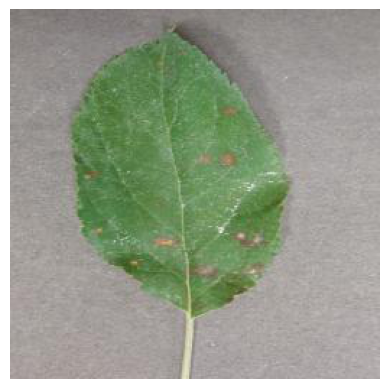

In [28]:
image_path = r'C:\Users\adity\plant-disease-prediction-cnn-deep-leanring-project\model_training_notebook\plantvillage dataset\color\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [29]:
image_path = r'C:\Users\adity\plant-disease-prediction-cnn-deep-leanring-project\model_training_notebook\plantvillage dataset\color\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[129 124 121]
  [131 126 123]
  [131 126 123]
  ...
  [140 136 133]
  [134 130 127]
  [130 126 123]]

 [[131 126 123]
  [133 128 125]
  [132 127 124]
  ...
  [142 138 135]
  [141 137 134]
  [140 136 133]]

 [[122 117 114]
  [124 119 116]
  [127 122 119]
  ...
  [142 138 135]
  [145 141 138]
  [146 142 139]]

 ...

 [[161 151 150]
  [163 153 152]
  [165 155 154]
  ...
  [175 169 169]
  [179 173 173]
  [182 176 176]]

 [[160 150 149]
  [163 153 152]
  [167 157 156]
  ...
  [174 168 168]
  [175 169 169]
  [177 171 171]]

 [[172 162 161]
  [172 162 161]
  [172 162 161]
  ...
  [172 166 166]
  [170 164 164]
  [169 163 163]]]


In [30]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [31]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [32]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [33]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [34]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

c:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [37]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


c:\Users\adity\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1254s 921ms/step - accuracy: 0.5934 - loss: 1.8807 - val_accuracy: 0.8516 - val_loss: 0.4718
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2947
Epoch 3/5


c:\Users\adity\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 883s 650ms/step - accuracy: 0.9151 - loss: 0.2664 - val_accuracy: 0.8776 - val_loss: 0.3936
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.2650e-06
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 937s 690ms/step - accuracy: 0.9672 - loss: 0.1041 - val_accuracy: 0.8852 - val_loss: 0.4289


**Model Evaluation**

In [38]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 46s 134ms/step - accuracy: 0.8884 - loss: 0.4114
Validation Accuracy: 88.52%


In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [7]:
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Load class indices from JSON file (make sure the path is correct)
# Option 1: Using raw string literal
with open(r'C:\Users\adity\plant-disease-prediction-cnn-deep-leanring-project\model_training_notebook\class_indices.json') as f:
    class_indices = json.load(f)

# Option 2: Using forward slashes
# with open('C:/Users/adity/plant-disease-prediction-cnn-deep-leanring-project/model_training_notebook/class_indices.json') as f:
#     class_indices = json.load(f)

# Define the number of classes
num_classes = len(class_indices)  # This will give you the total number of classes

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Output layer
model.add(Dense(num_classes, activation='softmax'))  # Use the defined num_classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, print the model summary to verify the architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,542 (182.36 MB)

 Trainable params: 47,805,350 (182.36 MB)

 Non-trainable params: 192 (768.00 B)

**Building a Predictive System**

In [42]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [43]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [44]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [45]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [50]:
# Example Usage
image_path = 'C:\\Users\\adity\\plant-disease-prediction-cnn-deep-leanring-project\\test_images\\test_apple_black_rot.JPG'

#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Predicted Class Name: Apple___Black_rot


**Save the model to Google drive or local**

In [51]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [52]:
model.save('plant_disease_prediction_model.h5')

In [53]:
import pickle
from tensorflow.keras.models import model_from_json

# Load the model you saved
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

# Serialize model to JSON
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Serialize weights using pickle
weights = model.get_weights()
with open('model_weights.pkl', 'wb') as pkl_file:
    pickle.dump(weights, pkl_file)


In [54]:
# Load the architecture
with open('model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# Load weights
with open('model_weights.pkl', 'rb') as pkl_file:
    weights = pickle.load(pkl_file)
model.set_weights(weights)

# Now the model is ready for inference


In [56]:
# Save the model in the SavedModel format
model.export('saved_model/')

# Load it later using
new_model = tf.keras.models.load_model('saved_model/')


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  1116596246800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596247568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596245456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596248528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596248720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596249296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596249488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1116596250064: TensorSpec(shape=(), dtype=tf.resource, name=None)


ValueError: File format not supported: filepath=saved_model/. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(saved_model/, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).